In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [3]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_sansN.csv')
reader = pd.read_csv(file, delimiter=',')

In [4]:
reader[16:25]

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
16,chr1,68763,68788,GVBQ,377,NaN,NaN,NaN
17,chr1,72276,72292,GVBQ,1585,NaN,NaN,NaN
18,chr1,73877,73901,Canonical,552,NaN,NaN,NaN
19,chr1,74453,74479,Bulge,552,NaN,NaN,NaN
20,chr1,84001,84027,Canonical,2839,NaN,NaN,NaN
21,chr1,86866,86883,Bulge,435,NaN,NaN,NaN
22,chr1,87318,87340,GVBQ,435,NaN,NaN,NaN
23,chr1,93031,93056,Canonical,4173,NaN,NaN,NaN
24,chr1,97229,97254,LongLoop,1293,NaN,NaN,NaN


### Création des fichiers de comparaison

### A ne pas refaire tourner - fichier sans N

In [2]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit.csv')
reader = pd.read_csv(file, delimiter=',')

In [3]:
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,2402,2426,Bulge,473,NaN,NaN,NaN,NNNNNNNNNNNNNNNNNNNNNNNN
1,chr1,2899,2933,LongLoop,473,NaN,NaN,NaN,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
2,chr1,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
3,chr1,11469,11503,Canonical,918,NaN,NaN,NaN,GGGAAACACCCGGAGCATATGCTGTTTGGTCTCA
4,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
...,...,...,...,...,...,...,...,...,...
720229,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN,gtctttgccccattttatatt
720230,chr21,48117475,48117497,Canonical,2462,NaN,NaN,NaN,atcatcattcactctgcaataa
720231,chr21,48119959,48119981,GVBQ,2462,NaN,NaN,NaN,NNNNNNNNNNNNNNNNNNNNNN
720232,chr21,48123506,48123534,Bulge,2176,NaN,NaN,NaN,NNNNNNNNNNNNNNNNNNNNNNNNNNNN


In [8]:
contain_values = reader[~reader['sequence'].str.contains('N')]
contain_values = contain_values.reset_index(drop=True)
contain_values.to_csv('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv', index = False)

### A ne pas refaire tourner

In [9]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader = pd.read_csv(file, delimiter=',')

In [10]:
for i in range (1,23):
    test = reader[(reader['chr'] == f'chr{i}')]
    test = test[['chr','start','end']]
    test = test.sort_values(['start','end'])
    test['chr'] = i
    path = f"c:/Users/BlueC/Documents/Mines/Santé/Code/np_random_{i}_sansN.txt"
    np.savetxt(path, test.values, fmt='%s', delimiter='\t')

In [11]:
for i in (['X','Y']):
    test = reader[(reader['chr'] == f'chr{i}')]
    test = test[['chr','start','end']]
    test = test.sort_values(['start','end'])
    test['chr'] = i
    path = f"c:/Users/BlueC/Documents/Mines/Santé/Code/np_random_{i}_sansN.txt"
    np.savetxt(path, test.values, fmt='%s', delimiter='\t')


### Analyse des données en sortie

In [5]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_1_sansN')
my_col = ['chr', 'pos', 'name', 'orig', 'mut', '%', 'PASS','INFOS', 'AA']
separateurs = "\t|AA="
reader2 = pd.read_csv(file2, sep = separateurs, names = my_col, header = None, engine ='python')
reader2 = reader2.drop_duplicates()
reader2 = reader2.reset_index(drop=True)

In [9]:
reader2.drop_duplicates()

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=23344;E...,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


In [8]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2 = pd.read_csv(file2)
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=23344;E...,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


In [10]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = []
nb_mutations = []
nb_G4 = []
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random.append(n)
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations.append(n)
    
    nb_G4.append(len(reader[reader['chr'] == f'chr{i}']))

In [11]:
nb_G4

[57985,
 51559,
 37527,
 28636,
 33211,
 32185,
 36458,
 30036,
 28307,
 33091,
 38096,
 29974,
 12776,
 18215,
 18775,
 27700,
 33742,
 14031,
 33746,
 21120,
 6675,
 14075,
 28186]

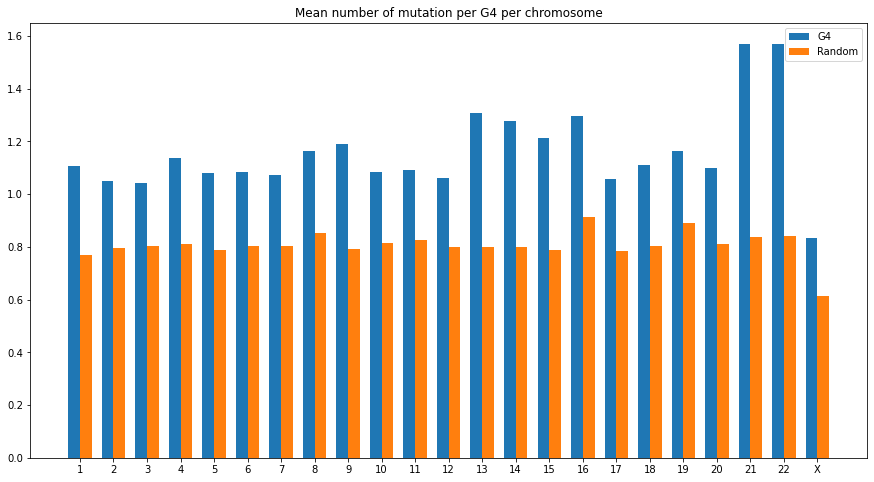

In [12]:
x = np.arange(len(nb_mutations))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, np.array(nb_mutations).astype(float)/np.array(nb_G4).astype(float), largeur)
r2 = ax.bar(x + largeur/2, np.array(nb_mutations_random).astype(float)/np.array(nb_G4).astype(float), largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chr)

plt.legend(['G4', 'Random'])

plt.title('Mean number of mutation per G4 per chromosome')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig14.jpg')
plt.show()

In [22]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = 0
nb_mutations = 0
nb_G4 = 0
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random += n
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations += n
    
    nb_G4 += len(reader[reader['chr'] == f'chr{i}'])

<ipython-input-26-907d87eae678>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


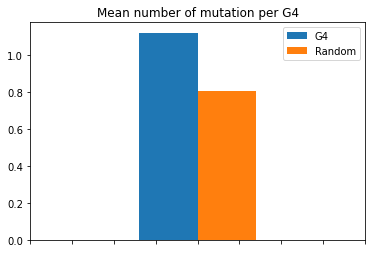

In [26]:
x = 0
largeur = .35

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, nb_mutations/nb_G4, largeur)
r2 = ax.bar(x + largeur/2, nb_mutations_random/nb_G4, largeur)

ax.set_xticklabels(' ')

plt.legend(['G4', 'Random'])
plt.xlim(-1,1)

plt.title('Mean number of mutation per G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig16.jpg')
plt.show()

### Etude primitive des données

##### Stat des mutations

In [29]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader = pd.read_csv(file, delimiter=',')
reader = reader[reader['chr'] == 'chr1']
reader[5:15]

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
5,chr1,26787,26806,Bulge,2197,NaN,NaN,NaN,ctcggccgggcgcagcggc
6,chr1,39044,39069,GVBQ,3039,NaN,NaN,NaN,gataaaactacttggctgcaaacac
7,chr1,42108,42132,Bulge,3039,NaN,NaN,NaN,catgtcaagggctgaacatctatg
8,chr1,50830,50851,GVBQ,3203,NaN,NaN,NaN,TTACTGGACTTGTCAACAAAC
9,chr1,54054,54076,GVBQ,708,NaN,NaN,NaN,ATTCTAAATAGATGTGTAGAAA
10,chr1,54784,54812,Bulge,708,NaN,NaN,NaN,tttccttttctttctttcattctttctt
11,chr1,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
12,chr1,64196,64219,GVBQ,1147,NaN,NaN,NaN,ATCAGTATTTTTATGCTGATAAT
13,chr1,65366,65393,Bulge,1147,NaN,NaN,NaN,CTTGTGAGACTATAAAAGTTAGTCTCA
14,chr1,68112,68149,Bulge,207,NaN,NaN,NaN,agatgtggccgtaagactgaaatcacttaggtgactt


In [30]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2['length'] = reader2['end'] - reader2['start'] + 1
reader2

,Unnamed: 0,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,length
0,0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,27
1,1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,27
2,2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,20
3,3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,28
4,4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46645,46645,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,40
46646,46646,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,40
46647,46647,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,17
46648,46648,1,249218098,rs552245484,C,G,100,PASS,AC=7;AF=0.00139776;AN=5008;NS=2504;DP=19100;EA...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,17


In [31]:
cluster2 = reader2[reader2['distClosestG4'] <= 100]
cluster2 = cluster2[['start','end','type']]
cluster2 = cluster2.drop_duplicates()
cluster2 = cluster2.reset_index(drop=True)

cluster = reader[reader['distClosestG4'] <= 100]

In [32]:
nb_cluster = len(cluster2)
nb_cluster_i = len(cluster)
print("nb de G4 mutés en cluster : ",  nb_cluster)
print("Taux de G4 mutés en cluster : ", nb_cluster/len(reader2)*100, "%") #mutés en cluster / mutés
print("Taux de G4 en cluster : ", len(cluster)/len(reader)*100, "%") #cluster/total

nb de G4 mutés en cluster :  1555
Taux de G4 mutés en cluster :  3.3333333333333335 %
Taux de G4 en cluster :  5.159955160817453 %


In [33]:
G4_mutated = reader2[['start','end','type']]
G4_mutated = G4_mutated.drop_duplicates()

In [34]:
nb_clust_i = len(reader[reader['distClosestG4'] <= 100])
print("Taux de G4 en cluster ayant muté :", nb_cluster/nb_clust_i*100, "%")
print("Taux de G4 ayant muté :", len(G4_mutated)/len(reader)*100, "%") # nb G4 mutés/nb G4

Taux de G4 en cluster ayant muté : 51.971925133689844 %
Taux de G4 ayant muté : 53.30688971285677 %


In [35]:
print("Nombre de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100]))
print("Nombre de mutations : ", len(reader2))
print("Rapport des mutations en cluster sur le total des mutations :", len(reader2[reader2['distClosestG4'] <= 100])/len(reader2) )
print("Taux de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100])/ reader2[reader2['distClosestG4'] <= 100]['length'].sum()*100, "%")
print("Taux de mutations non clusterisées : ", len(reader2[reader2['distClosestG4'] > 100])/ reader2[reader2['distClosestG4'] > 100]['length'].sum()*100, "%")

Nombre de mutations en cluster :  2362
Nombre de mutations :  46650
Rapport des mutations en cluster sur le total des mutations : 0.050632368703108256
Taux de mutations en cluster :  3.6035211375043863 %
Taux de mutations non clusterisées :  3.5781603595611644 %


Pour les G4 dans le génome référencé, on avait :

In [36]:
print("Nombre de mutations en cluster :  15915")
print("Nombre de mutations :  65966")
print("Rapport des mutations en cluster sur le total des mutations :", 15915/65966)
print("Taux de mutations en cluster :  3.2858809319803033 %")
print("Taux de mutations non clusterisées :  3.6378609078407598 %")

Nombre de mutations en cluster :  15915
Nombre de mutations :  65966
Rapport des mutations en cluster sur le total des mutations : 0.2412606494254616
Taux de mutations en cluster :  3.2858809319803033 %
Taux de mutations non clusterisées :  3.6378609078407598 %


Les résultats sont assez étranges : on observe moins de G4 mutés dans un tirage aléatoire que dans le génome avéré : 48% contre 59%. Les G4 seraient donc plus soumis à la mutation que le reste du génome. A creuser...

### Analyse des nucléotides dans le chr1

In [118]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')
reader_rd = reader_rd[reader_rd['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')

In [119]:
freq = list(reader2_rd['INFOS'].str.split(";"))
freq = pd.DataFrame(freq)
a = list(freq[1].str.split("="))
b = [(x[1]) for x in a]
freq2 = pd.DataFrame(b)
reader2_rd_f = reader2_rd
reader2_rd_f['INFOS'] = freq2

In [120]:
reader2_rd

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,0.000599042,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,0.000199681,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,0.000599042,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,0.000199681,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,0.109026,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,0.000599042,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,0.000199681,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,0.000199681,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,0.000199681,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


In [83]:
a = ['',1]
b = [2,3]
np.array([a,b])

array([[0, 1],
       [2, 3]])

In [39]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_.bed')
reader = pd.read_csv(file, delimiter='\t')
reader = reader[reader['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')

In [40]:
count_mut = reader2[['orig','mut']]
count_mut['number'] = 1

<ipython-input-40-4f50bcf5cee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1


In [41]:
count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
count_orig = count_orig.reset_index()

In [42]:
nb_G_G4 = 356722 + 688558
nb_C_G4 = 133607 + 113318
nb_A_G4 = 168955 + 89886
nb_T_G4 = 135713 + 62185
#chiffres trouvés après analyse bash des fichiers 

In [43]:
taux_G = float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
taux_C = float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
taux_A = float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
taux_T = float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)

In [44]:
count_mut_rd = reader2_rd[['orig','mut']]
count_mut_rd['number'] = 1

<ipython-input-44-2548b0987d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


In [45]:
count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
count_orig_rd = count_orig_rd.reset_index()

In [46]:
count_orig_rd[count_orig_rd['orig'] == 'G']

,orig,number
191,G,12666


In [47]:
nb_G_G4_rd = 152407 + 157113
nb_C_G4_rd = 222141 + 152001
nb_A_G4_rd = 213770 + 219015
nb_T_G4_rd = 214190 + 218223
#chiffres trouvés après analyse bash du fichier

 grep -o "G" FILE | wc -l

In [48]:
taux_G_rd = float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
taux_C_rd = float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
taux_A_rd = float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
taux_T_rd = float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

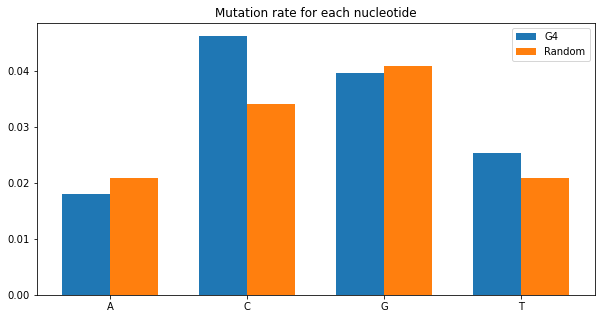

In [49]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()

### Analyse des nucléotides dans l'ensemble des chr

In [14]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4.csv')
reader_rd = pd.read_csv(file, delimiter=',')

file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories.bed')
reader = pd.read_csv(file, delimiter='\t')

In [15]:
nb_G_G4 = 11779730
nb_C_G4 = 2763947
nb_A_G4 = 2913392
nb_T_G4 = 2231649
#chiffres trouvés après analyse bash des fichiers 

In [16]:
nb_G_G4_rd = 3550452
nb_C_G4_rd = 4214934
nb_A_G4_rd = 4979202
nb_T_G4_rd = 4984350
#chiffres trouvés après analyse bash des fichiers

In [23]:
file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_2_final.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')
reader2_rd = reader2_rd.drop('Unnamed: 0',axis =1)
reader2_rd.drop([1,3], axis = 0)

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS
0,2,12385,esv3589586,G,<CN0>,100,PASS,"AC=3;AF=0.000599042;AN=5008;CIEND=0,500;CIPOS=...",NaN,15937,15965,Canonical,7007,NaN,NaN,NaN
2,2,15953,rs11896882,G,A,100,PASS,AC=92;AF=0.0183706;AN=5008;NS=2504;DP=20037;EA...,.|||;VT=SNP,15937,15965,Canonical,7007,NaN,NaN,NaN
4,2,23163,esv3589587,C,<CN2>,100,PASS,AC=3;AF=0.000599042;AN=5008;CS=DUP_gs;END=9961...,NaN,39121,39146,Bulge,2013,NaN,NaN,NaN
5,2,41177,rs568687781,A,G,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19635;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
6,2,41187,rs80074258,T,C,100,PASS,AC=27;AF=0.00539137;AN=5008;NS=2504;DP=19906;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43360,2,243073393,rs569948112,CTTA,C,100,PASS,AC=10;AF=0.00199681;AN=5008;NS=2504;DP=22705;E...,NaN,243073363,243073397,GVBQ,9006,NaN,NaN,NaN
43361,2,243082431,rs562870785,G,A,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=18025;EA...,.|||;VT=SNP,243082403,243082434,Canonical,6682,NaN,NaN,NaN
43362,2,243164875,rs375360405,CAA,C,100,PASS,AC=17;AF=0.00339457;AN=5008;NS=2504;DP=15600;E...,NaN,243164877,243164895,GVBQ,2900,NaN,NaN,NaN
43363,2,243177577,rs530860990,CTCTT,C,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=19162;EA...,NaN,243177560,243177581,Bulge,65,NaN,NaN,NaN


 grep -o -i "G" * | wc -l

In [17]:
list_chr = [str(i+1) for i in range (22)] + ['X']

taux_G = 0
taux_C = 0
taux_T = 0
taux_A = 0

taux_G_rd = 0
taux_C_rd = 0
taux_T_rd = 0
taux_A_rd = 0

for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2, delimiter=',')
    
    count_mut = reader2[['orig','mut']]
    count_mut['number'] = 1
    count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
    count_orig = count_orig.reset_index()
    
    taux_G += float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
    taux_C += float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
    taux_A += float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
    taux_T += float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)
    
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_{i}_final.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')
    
    count_mut_rd = reader2_rd[['orig','mut']]
    count_mut_rd['number'] = 1
    count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
    count_orig_rd = count_orig_rd.reset_index()
    
    taux_G_rd += float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
    taux_C_rd += float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
    taux_A_rd += float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
    taux_T_rd += float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

<ipython-input-17-b9236732a456>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1
<ipython-input-17-b9236732a456>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_2_final.csv'

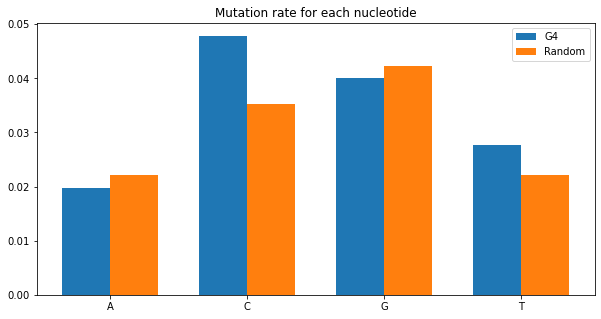

In [58]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()